In [1]:
                                               #Auto Insurance

In [2]:
import pandas as pd
import matplotlib.pylab as plt
from scipy.cluster.hierarchy import linkage,fcluster
import scipy.cluster.hierarchy as sch 
from sklearn.cluster import AgglomerativeClustering

In [3]:
at = pd.read_csv("AutoInsurance (1).csv")

print(at.describe())

at.info()

       Customer Lifetime Value        Income  Monthly Premium Auto  \
count              9134.000000   9134.000000           9134.000000   
mean               8004.940475  37657.380009             93.219291   
std                6870.967608  30379.904734             34.407967   
min                1898.007675      0.000000             61.000000   
25%                3994.251794      0.000000             68.000000   
50%                5780.182197  33889.500000             83.000000   
75%                8962.167041  62320.000000            109.000000   
max               83325.381190  99981.000000            298.000000   

       Months Since Last Claim  Months Since Policy Inception  \
count              9134.000000                    9134.000000   
mean                 15.097000                      48.064594   
std                  10.073257                      27.905991   
min                   0.000000                       0.000000   
25%                   6.000000              

In [4]:
#we have to dro the unnecessary columns
at.drop(at.columns[[0,1,2,3,6,8,10,11,19,22,23]],axis=1 , inplace=True)
at

,Coverage,Education,EmploymentStatus,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Sales Channel,Total Claim Amount
0,Basic,Bachelor,Employed,56274,69,32,5,0,1,Corporate Auto,Corporate L3,Agent,384.811147
1,Extended,Bachelor,Unemployed,0,94,13,42,0,8,Personal Auto,Personal L3,Agent,1131.464935
2,Premium,Bachelor,Employed,48767,108,18,38,0,2,Personal Auto,Personal L3,Agent,566.472247
3,Basic,Bachelor,Unemployed,0,106,18,65,0,7,Corporate Auto,Corporate L2,Call Center,529.881344
4,Basic,Bachelor,Employed,43836,73,12,44,0,1,Personal Auto,Personal L1,Agent,138.130879
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,Basic,Bachelor,Employed,71941,73,18,89,0,2,Personal Auto,Personal L1,Web,198.234764
9130,Extended,College,Employed,21604,79,14,28,0,1,Corporate Auto,Corporate L3,Branch,379.200000
9131,Extended,Bachelor,Unemployed,0,85,9,37,3,2,Corporate Auto,Corporate L2,Branch,790.784983
9132,Extended,College,Employed,21941,96,34,3,0,3,Personal Auto,Personal L2,Branch,691.200000


In [5]:
#now we have standardize the numerical columns.
def std_fnc(i):
    x=(i-i.min())/(i.std())
    return(x)

std_at = std_fnc(at.iloc[ : , [3,4,5,6,7,8,12]])
std_at.describe()

,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,1.239549,0.936390,1.498721,1.722375,0.422226,0.822603,1.493940
std,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.203441,0.595637,0.860030,0.000000,0.000000,0.936865
50%,1.115524,0.639387,1.389819,1.720061,0.000000,0.418378,1.321330
75%,2.051356,1.395026,2.283274,2.544257,0.000000,1.255135,1.884391
max,3.291024,6.887940,3.474547,3.547625,5.492191,3.347026,9.959173


In [12]:
#Now we have to create dummy variable for categorical columns.

at_dummy = pd.get_dummies(at)

at_new = pd.concat([std_at , at_dummy], axis = 1)

at_new.describe()

,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Income,Monthly Premium Auto,Months Since Last Claim,...,Policy_Personal L1,Policy_Personal L2,Policy_Personal L3,Policy_Special L1,Policy_Special L2,Policy_Special L3,Sales Channel_Agent,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,...,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,1.239549,0.936390,1.498721,1.722375,0.422226,0.822603,1.493940,37657.380009,93.219291,15.097000,...,0.135757,0.232319,0.375082,0.007226,0.017955,0.016203,0.380666,0.281038,0.193234,0.145062
std,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30379.904734,34.407967,10.073257,...,0.342549,0.422334,0.484171,0.084701,0.132795,0.126263,0.485577,0.449531,0.394857,0.352183
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,61.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.203441,0.595637,0.860030,0.000000,0.000000,0.936865,0.000000,68.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.115524,0.639387,1.389819,1.720061,0.000000,0.418378,1.321330,33889.500000,83.000000,14.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.051356,1.395026,2.283274,2.544257,0.000000,1.255135,1.884391,62320.000000,109.000000,23.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,3.291024,6.887940,3.474547,3.547625,5.492191,3.347026,9.959173,99981.000000,298.000000,35.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


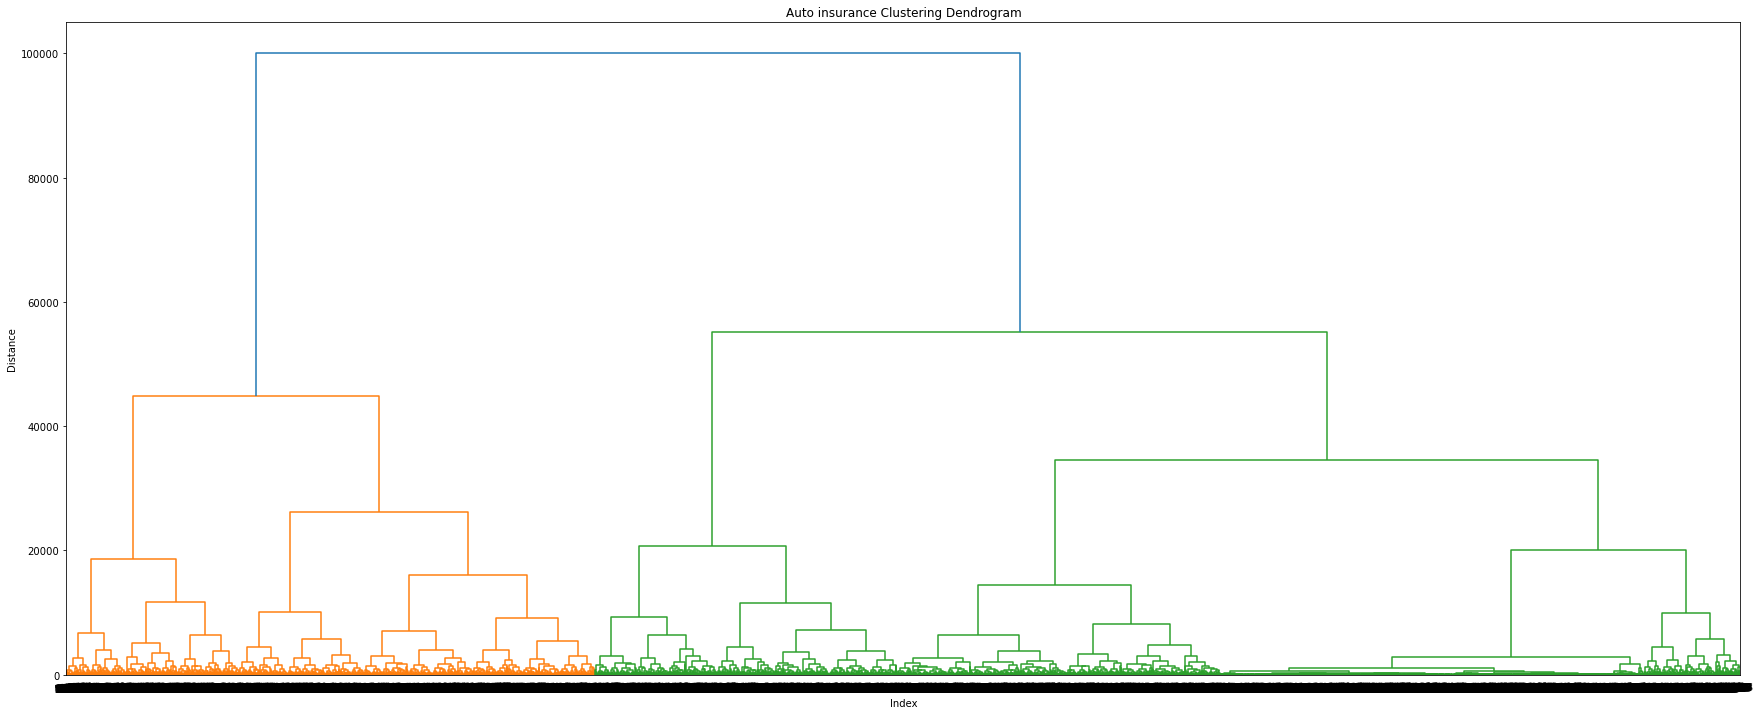

In [13]:
#now we've to create the linkage of the data.
z = linkage(at_new , method = "complete" ,metric = "euclidean")
plt.figure(figsize=(30, 12));plt.title('Auto insurance Clustering Dendrogram');plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(z, 
    leaf_rotation = 5,  # rotates the x axis labels
    leaf_font_size = 10 # font size for the x axis labels
)
plt.show()

In [8]:
at_comp = AgglomerativeClustering(n_clusters = 4 , linkage = "complete" ,affinity = "euclidean" ).fit(at_new)
at_comp.labels_

array([1, 0, 2, ..., 0, 0, 0], dtype=int64)

In [9]:
at_cluster_column = pd.Series(at_comp.labels_)

#now assign this matrix to to data set as a new column.

at['grouping']=at_cluster_column

at.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Coverage                       9134 non-null   object 
 1   Education                      9134 non-null   object 
 2   EmploymentStatus               9134 non-null   object 
 3   Income                         9134 non-null   int64  
 4   Monthly Premium Auto           9134 non-null   int64  
 5   Months Since Last Claim        9134 non-null   int64  
 6   Months Since Policy Inception  9134 non-null   int64  
 7   Number of Open Complaints      9134 non-null   int64  
 8   Number of Policies             9134 non-null   int64  
 9   Policy Type                    9134 non-null   object 
 10  Policy                         9134 non-null   object 
 11  Sales Channel                  9134 non-null   object 
 12  Total Claim Amount             9134 non-null   f

In [10]:
#now take the category column to the 1st of the data set.
at_final = at.iloc[ : ,[13,0,1,2,3,4,6,7,8,9,10,11,12] ]
at_final

,grouping,Coverage,Education,EmploymentStatus,Income,Monthly Premium Auto,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Sales Channel,Total Claim Amount
0,1,Basic,Bachelor,Employed,56274,69,5,0,1,Corporate Auto,Corporate L3,Agent,384.811147
1,0,Extended,Bachelor,Unemployed,0,94,42,0,8,Personal Auto,Personal L3,Agent,1131.464935
2,2,Premium,Bachelor,Employed,48767,108,38,0,2,Personal Auto,Personal L3,Agent,566.472247
3,0,Basic,Bachelor,Unemployed,0,106,65,0,7,Corporate Auto,Corporate L2,Call Center,529.881344
4,2,Basic,Bachelor,Employed,43836,73,44,0,1,Personal Auto,Personal L1,Agent,138.130879
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,1,Basic,Bachelor,Employed,71941,73,89,0,2,Personal Auto,Personal L1,Web,198.234764
9130,0,Extended,College,Employed,21604,79,28,0,1,Corporate Auto,Corporate L3,Branch,379.200000
9131,0,Extended,Bachelor,Unemployed,0,85,37,3,2,Corporate Auto,Corporate L2,Branch,790.784983
9132,0,Extended,College,Employed,21941,96,3,0,3,Personal Auto,Personal L2,Branch,691.200000


In [11]:
#Aggregate mean of each cluster.
at_final.iloc[:, 1:].groupby(at.grouping).mean()

#here we can see there are 4 types of grouping present as per insurance type.

,Income,Monthly Premium Auto,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
grouping,,,,,,
0,11899.540834,93.255647,48.041703,0.375760,2.983710,524.727130
1,67494.434985,93.489680,48.565531,0.370485,2.923633,332.033304
2,44189.420316,93.945255,47.379562,0.413017,2.972628,375.056853
3,90427.638186,91.231013,48.339662,0.405063,2.956751,304.904357
